## Extraccion de la data de la pagina de la data:
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

In [ ]:
# primero tenemos que cargar nuestra api de kaggle en el json
from google.colab import files
files.upload()  # selecciona kaggle.json cuando te lo pida


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevinastudillo123","key":"6260009df58d4690344febb42b215127"}'}

In [ ]:
# Paso 2: Crear la carpeta y mover el archivo
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Paso 3: Instalar la librería Kaggle si no está instalada
!pip install -q kaggle

# Paso 4: Descargar y descomprimir el dataset
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis
!unzip -o twitter-entity-sentiment-analysis.zip -d twitter_sentiment_data



Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
twitter-entity-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_sentiment_data/twitter_training.csv  
  inflating: twitter_sentiment_data/twitter_validation.csv  


In [ ]:
import pandas as pd

# Cargar archivo de entrenamiento
df_train = pd.read_csv("twitter_sentiment_data/twitter_training.csv", header=None)

# Cargar archivo de validación
df_val = pd.read_csv("twitter_sentiment_data/twitter_validation.csv", header=None)


In [ ]:
# vemos que no tienen emcabezados
#df_train.head()
df_val.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
# agregamos las columnas a los datos
df_train.columns = ['Tweet ID', 'entity','sentiment','Tweet content']
df_val.columns  = ['Tweet ID', 'entity','sentiment','Tweet content']

In [ ]:
# vemos la forma de la data para ver cuantas hay en cada set de datos
print(df_train.shape)
print(df_val.shape)



(74682, 4)
(1000, 4)


In [ ]:
# Separate features (X) and target variable (y).  Replace 'target_column' with the actual name of your target column.
X_train = df_train.drop('sentiment', axis=1)
Y_train = df_train['sentiment']

X_val = df_val.drop('sentiment', axis=1)
Y_val = df_val['sentiment']


In [ ]:
X_train

,Tweet ID,entity,Tweet content
0,2401,Borderlands,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...
2,2401,Borderlands,im getting on borderlands and i will kill you ...
3,2401,Borderlands,im coming on borderlands and i will murder you...
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,9200,Nvidia,Just realized that the Windows partition of my...
74678,9200,Nvidia,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Just realized between the windows partition of...


In [ ]:
Y_train

,sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
74677,Positive
74678,Positive
74679,Positive
74680,Positive


In [ ]:
df_train

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Graficas de la data


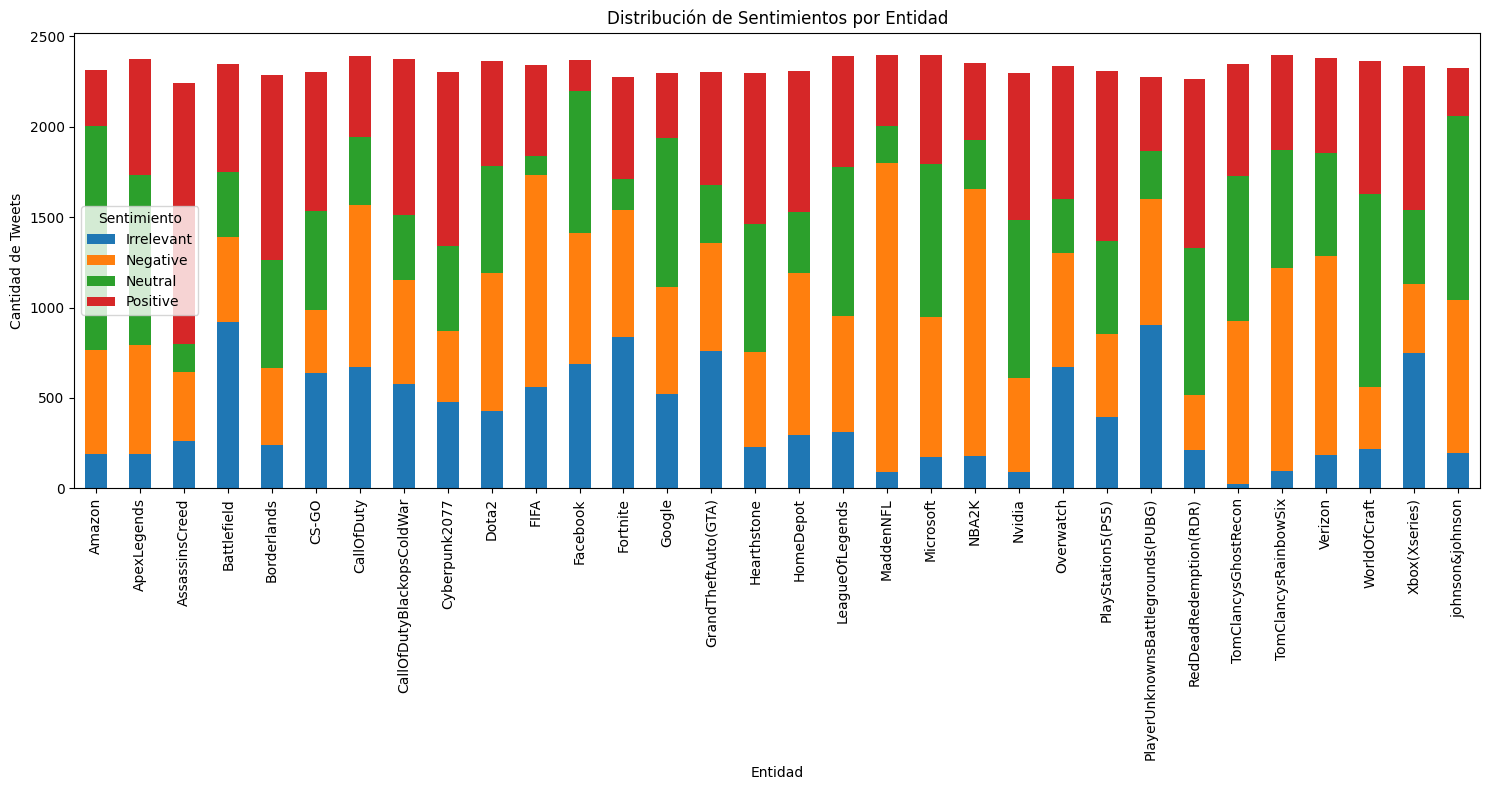

sentiment,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupación
sentiment_by_entity = df_train.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)

# Tamaño razonable
plt.figure(figsize=(15, 8))

# Gráfica
sentiment_by_entity.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribución de Sentimientos por Entidad')
plt.xlabel('Entidad')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()
sentiment_by_entity

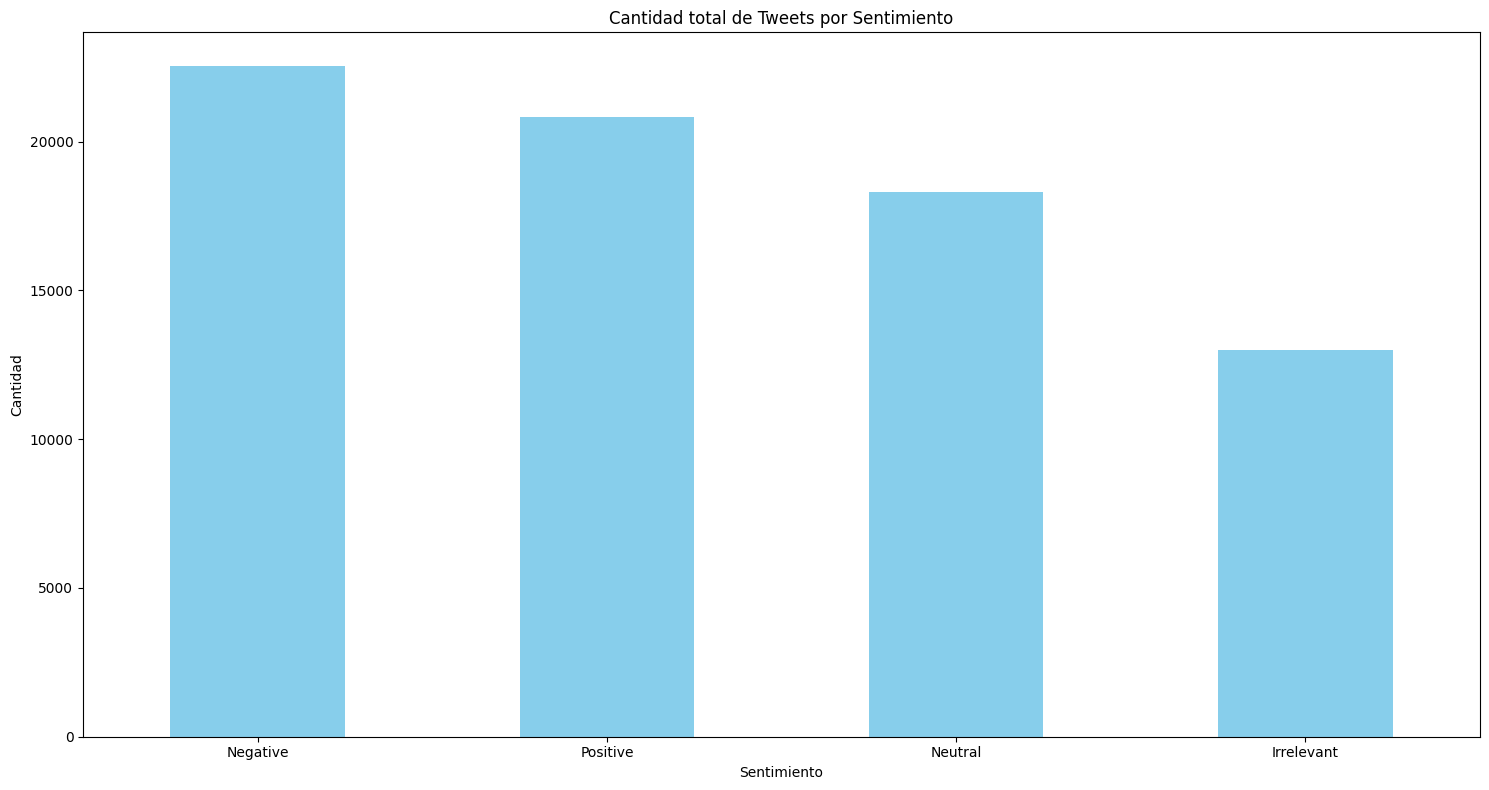

In [ ]:
sentiment_counts = df_train['sentiment'].value_counts()
plt.figure(figsize=(15, 8))

sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad total de Tweets por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


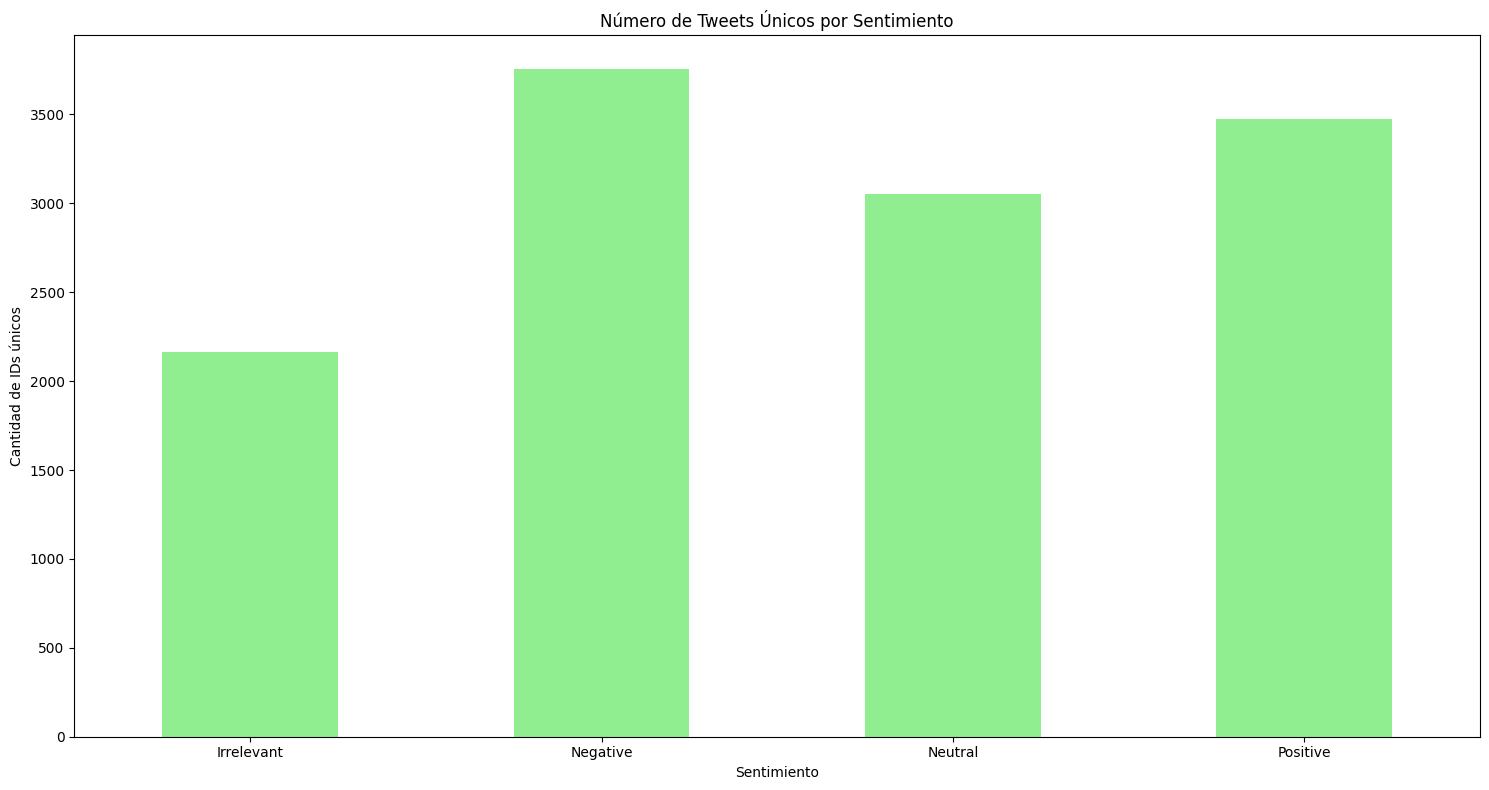

In [ ]:
unique_ids_per_sentiment = df_train.groupby('sentiment')['Tweet ID'].nunique()

plt.figure(figsize=(15, 8))
unique_ids_per_sentiment.plot(kind='bar', color='lightgreen')
plt.title('Número de Tweets Únicos por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de IDs únicos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


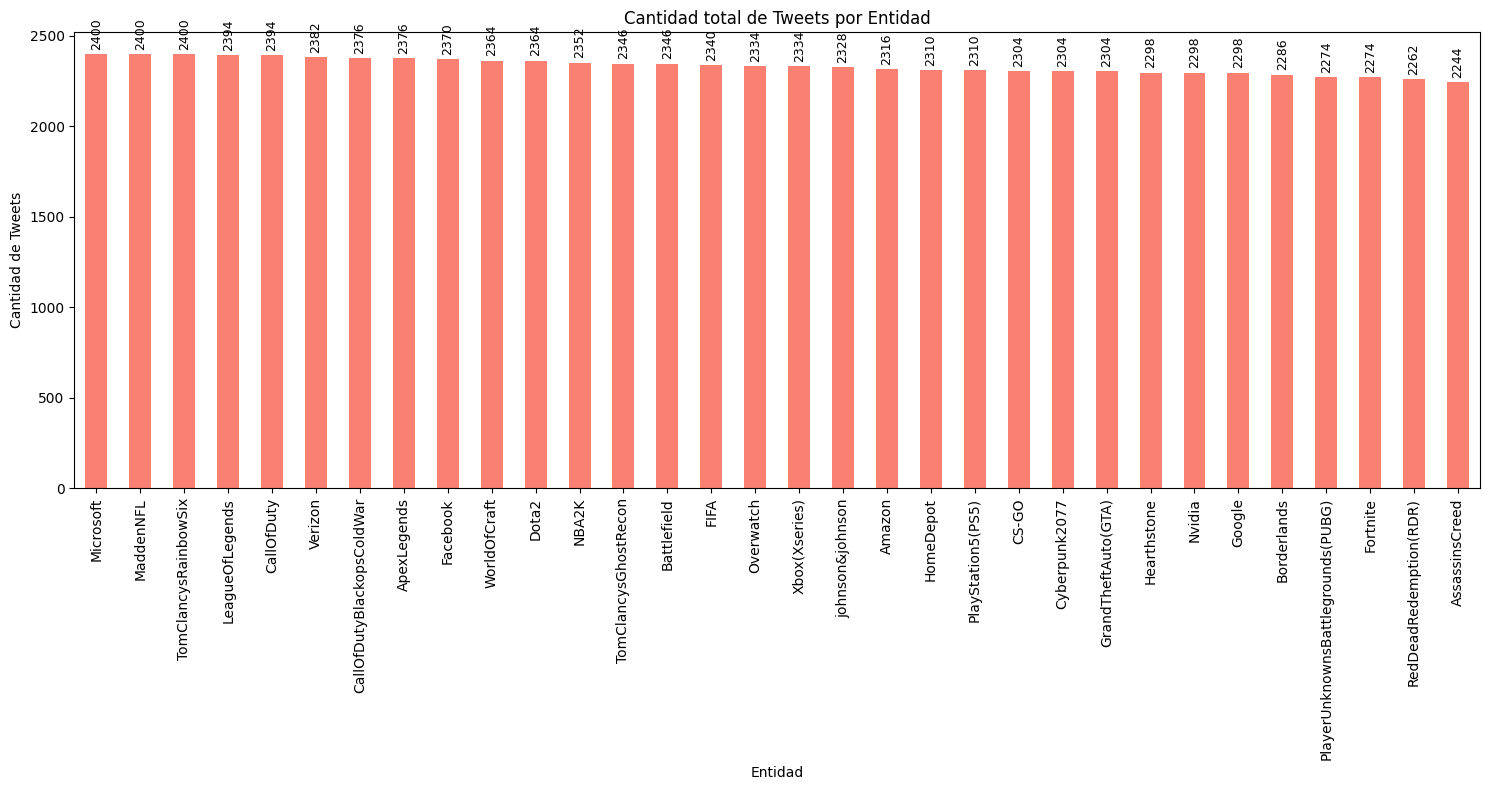

In [ ]:
import matplotlib.pyplot as plt

tweets_per_entity = df_train['entity'].value_counts()

plt.figure(figsize=(15, 8))
ax = tweets_per_entity.plot(kind='bar', color='salmon')
plt.title('Cantidad total de Tweets por Entidad')
plt.xlabel('Entidad')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=90)

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(tweets_per_entity):
    ax.text(i, v + max(tweets_per_entity)*0.01, str(v), ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()


## Limpieza y vectorizacion de textos

In [ ]:
# funcion para limpiar texto:

import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))


def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñ\s]', '', texto)
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]
    return ' '.join(palabras)


#Limpiamos texto
X_train['Clean Tweet content'] = X_train['Tweet content'].apply(limpiar_texto)
X_val['Clean Tweet content'] = X_val['Tweet content'].apply(limpiar_texto)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train

,Tweet ID,entity,Tweet content,Clean Tweet content
0,2401,Borderlands,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
...,...,...,...,...
74677,9200,Nvidia,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Just realized between the windows partition of...,just realized between the windows partition of...


In [ ]:
Y_train

,sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
74677,Positive
74678,Positive
74679,Positive
74680,Positive


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def vectorizar_texto(textos, metodo='tfidf', modelo_preentrenado=None, **kwargs):
    """
    Vectoriza una lista de textos usando distintos métodos.

    Parámetros:
    -----------
    textos : list or pd.Series
        Lista de textos limpios a vectorizar.

    metodo : str
        Método de vectorización a usar. Opciones disponibles:
        - 'tfidf': Usa TF-IDF con sklearn (requiere kwargs como max_features, ngram_range, etc.)
        - 'bow': Bag of Words con CountVectorizer
        - 'word2vec': Promedia los vectores de palabras usando modelo_preentrenado (Word2Vec, GloVe, etc.)
        - 'bert': Usa SentenceTransformer para codificar textos completos (modelo_preentrenado debe ser un modelo compatible)

    modelo_preentrenado : modelo opcional
        Modelo requerido para 'word2vec' o 'bert'. Por ejemplo:
        - Para word2vec: modelo de gensim (`api.load(...)`)
        - Para bert: modelo de SentenceTransformer (`SentenceTransformer(...)`)

    kwargs : argumentos opcionales
        Parámetros extra para los vectorizadores sklearn (e.g., max_features, stop_words, etc.)

    Retorna:
    --------
    - Matriz numpy o sparse matrix con las representaciones vectoriales.
    - Objeto del vectorizador o None (si usas embeddings).

    Ejemplo de uso:
    ---------------
    X_vec, vectorizer = vectorizar_texto(textos, metodo='tfidf', max_features=500)
    X_vec, _ = vectorizar_texto(textos, metodo='word2vec', modelo_preentrenado=word2vec_model)

    """
    if metodo == 'tfidf':
        vectorizer = TfidfVectorizer(**kwargs)
        X_vec = vectorizer.fit_transform(textos)
        return X_vec, vectorizer

    elif metodo == 'bow':
        vectorizer = CountVectorizer(**kwargs)
        X_vec = vectorizer.fit_transform(textos)
        return X_vec, vectorizer

    elif metodo == 'word2vec':
        if modelo_preentrenado is None:
            raise ValueError("Debes proporcionar un modelo preentrenado para word2vec.")
        def promediar_vectores(doc):
            palabras = doc.split()
            vectores = [modelo_preentrenado[w] for w in palabras if w in modelo_preentrenado]
            return np.mean(vectores, axis=0) if vectores else np.zeros(modelo_preentrenado.vector_size)
        X_vec = np.array([promediar_vectores(doc) for doc in textos])
        return X_vec, None

    elif metodo == 'bert':
        if modelo_preentrenado is None:
            raise ValueError("Debes proporcionar un modelo de SentenceTransformer para BERT.")
        X_vec = modelo_preentrenado.encode(textos, show_progress_bar=True)
        return X_vec, None

    else:
        raise ValueError("Método no soportado. Usa 'tfidf', 'bow', 'word2vec' o 'bert'.")


In [ ]:
#vectorizamos todos los textos, con untotal de 500 palabras y hatsa con ngram=3 pal diccionario
X_train_vec, vectorizer = vectorizar_texto(X_train['Clean Tweet content'], metodo='tfidf', max_features=500, ngram_range=(1,3), stop_words='english')



In [ ]:
# vemos las palabraS O NGRAM QUE MAS PESON TUVIERON EN EL tfidf
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'access', 'access health',
       'access health care', 'account', 'achievement', 'actually', 'ago',
       'amazing', 'amazon', 'annoying', 'anymore', 'apex', 'apex legends',
       'app', 'apps', 'ass', 'assassins', 'assassins creed', 'away',
       'awesome', 'baby', 'baby powder', 'bad', 'ban', 'ban battlefield',
       'banned', 'battlefield', 'battlefield player', 'beautiful',
       'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitch',
       'black', 'black ops', 'black ops cold', 'borderlands', 'bought',
       'break', 'breakpoint', 'bring', 'bro', 'broken', 'business', 'buy',
       'buying', 'called', 'callofduty', 'came', 'card', 'cards', 'care',
       'cause', 'chance', 'change', 'character', 'check', 'cod', 'code',
       'cold', 'cold war', 'com', 'come', 'comes', 'coming', 'community',
       'companies', 'company', 'completely', 'congratulations', 'console',
       'content', 'cool', 'covid', 'crazy', 'creed', 'cs', 'csgo',
    

In [ ]:
# ESTE ES EL DICCIONARIO QUE NOS DICE QUE COLUMNA LE TOCA A CADA PALABRA:Te permite entender qué columna corresponde a qué palabra en la matriz dispersa (X) que usas como entrada para modelos de machine learning.
for palabra in sorted(vectorizer.vocabulary_):
    print(f"{palabra}: {vectorizer.vocabulary_[palabra]}")

# TODAS SIN ORDEN : vectorizer.vocabulary_


able: 0
absolutely: 1
access: 2
access health: 3
access health care: 4
account: 5
achievement: 6
actually: 7
ago: 8
amazing: 9
amazon: 10
annoying: 11
anymore: 12
apex: 13
apex legends: 14
app: 15
apps: 16
ass: 17
assassins: 18
assassins creed: 19
away: 20
awesome: 21
baby: 22
baby powder: 23
bad: 24
ban: 25
ban battlefield: 26
banned: 27
battlefield: 28
battlefield player: 29
beautiful: 30
believe: 31
best: 32
better: 33
big: 34
birthday: 35
bit: 36
bitch: 37
black: 38
black ops: 39
black ops cold: 40
borderlands: 41
bought: 42
break: 43
breakpoint: 44
bring: 45
bro: 46
broken: 47
business: 48
buy: 49
buying: 50
called: 51
callofduty: 52
came: 53
card: 54
cards: 55
care: 56
cause: 57
chance: 58
change: 59
character: 60
check: 61
cod: 62
code: 63
cold: 64
cold war: 65
com: 66
come: 67
comes: 68
coming: 69
community: 70
companies: 71
company: 72
completely: 73
congratulations: 74
console: 75
content: 76
cool: 77
covid: 78
crazy: 79
creed: 80
cs: 81
csgo: 82
currently: 83
cyberpunk: 84
d

In [ ]:
print(X_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 336852 stored elements and shape (74682, 500)>
  Coords	Values
  (0, 208)	0.47437810373669315
  (0, 156)	0.633257024901506
  (0, 41)	0.61151529425524
  (1, 69)	0.698130386988406
  (1, 225)	0.7159706437860552
  (2, 208)	0.3752453984693662
  (2, 156)	0.5009227507991967
  (2, 41)	0.483724477279599
  (2, 225)	0.6117825747272565
  (3, 208)	0.4389941422863763
  (3, 41)	0.5659022412332633
  (3, 69)	0.6978816492826118
  (4, 208)	0.47437810373669315
  (4, 156)	0.633257024901506
  (4, 41)	0.61151529425524
  (5, 208)	0.47437810373669315
  (5, 156)	0.633257024901506
  (5, 41)	0.61151529425524
  (6, 41)	0.2568167919472228
  (6, 201)	0.30837211358425043
  (6, 266)	0.30284671917944206
  (6, 148)	0.2560512553253057
  (6, 105)	0.22978339646528334
  (6, 229)	0.25064146911314145
  (6, 204)	0.3237849883075956
  :	:
  (74677, 293)	0.35966944771140064
  (74678, 224)	0.2974123568395492
  (74678, 206)	0.5429953342765796
  (74678, 99)	0.484377570173

In [ ]:
import pandas as pd

# Convertir matriz dispersa a DataFrame
df_vect = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())
df_vect


,able,absolutely,access,access health,access health care,account,achievement,actually,ago,amazing,...,wtf,xbox,xbox series,yall,yeah,year,years,yes,youre,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.378975,0.0,0.0,0.0
74678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.448352,0.0,0.0,0.0
74679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.388968,0.0,0.0,0.0
74680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.384680,0.0,0.0,0.0


### Implementacion de la Vectorizacion con la Prediccion usando modelos clasicos

In [ ]:
# Paso completo: vectorización TF-IDF + entrenamiento y evaluación con Naive Bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# === Vectorización TF-IDF ===
vectorizer = TfidfVectorizer(
    max_features=500,        # limitar a 500 características (palabras/ngramas)
    ngram_range=(1, 3),      # usar unigramas, bigramas y trigramas
    stop_words='english'     # eliminar palabras vacías en inglés
)

# Ajustar y transformar los datos de entrenamiento
X_train_vec = vectorizer.fit_transform(X_train['Clean Tweet content'])

# Transformar los datos de validación con el mismo vectorizador
X_val_vec = vectorizer.transform(X_val['Clean Tweet content'])

# === Entrenamiento con Multinomial Naive Bayes ===
modelo_nb = MultinomialNB(alpha=0.1)
modelo_nb.fit(X_train_vec, Y_train)

# === Predicción y evaluación ===
y_pred_nb = modelo_nb.predict(X_val_vec)

print("===== Multinomial Naive Bayes =====")
print(classification_report(Y_val, y_pred_nb))
print("Matriz de confusión:")
print(confusion_matrix(Y_val, y_pred_nb))


===== Multinomial Naive Bayes =====
              precision    recall  f1-score   support

  Irrelevant       0.56      0.27      0.36       172
    Negative       0.51      0.73      0.60       266
     Neutral       0.62      0.47      0.53       285
    Positive       0.57      0.66      0.61       277

    accuracy                           0.56      1000
   macro avg       0.57      0.53      0.53      1000
weighted avg       0.57      0.56      0.54      1000

Matriz de confusión:
[[ 46  54  20  52]
 [  6 194  30  36]
 [ 16  85 133  51]
 [ 14  50  30 183]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def train_and_evaluate(modelo, X_train_vec, y_train, X_val_vec, y_val, model_name="Modelo"):
    """
    Entrena y evalúa un modelo clásico de clasificación sobre datos previamente vectorizados.

    Parámetros:
    -----------
    modelo : objeto sklearn
        Instancia del clasificador que se desea entrenar.
    X_train_vec : array-like o matriz dispersa
        Conjunto de entrenamiento ya vectorizado (TF-IDF, BoW, Word2Vec, BERT, etc.).
    y_train : array-like
        Etiquetas del conjunto de entrenamiento.
    X_val_vec : array-like o matriz dispersa
        Conjunto de validación ya vectorizado.
    y_val : array-like
        Etiquetas del conjunto de validación.
    model_name : str, opcional
        Nombre del modelo, utilizado para impresión de resultados.

    Retorna:
    --------
    dict
        Diccionario con los siguientes elementos:
        - 'modelo': el modelo entrenado
        - 'report': diccionario con métricas de clasificación (`classification_report`)
        - 'confusion_matrix': matriz de confusión
    """
    modelo.fit(X_train_vec, y_train)
    y_pred = modelo.predict(X_val_vec)

    print(f"===== {model_name} =====")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

    return {
        'modelo': modelo,
        'report': classification_report(y_val, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, y_pred)
    }

def ejecutar_modelos_clasicos(X_train_raw, Y_train, X_val_raw, Y_val,
                              metodo_vector='tfidf', modelo_preentrenado=None, vectorizer_params={}):
    """
    Ejecuta un pipeline de clasificación de texto clásico que incluye:
    1) Vectorización del texto crudo (TF-IDF, BoW, Word2Vec o BERT)
    2) Entrenamiento y evaluación de múltiples modelos clásicos.

    Parámetros:
    -----------
    X_train_raw : list o pandas Series
        Textos crudos del conjunto de entrenamiento.
    Y_train : array-like
        Etiquetas del conjunto de entrenamiento.
    X_val_raw : list o pandas Series
        Textos crudos del conjunto de validación.
    Y_val : array-like
        Etiquetas del conjunto de validación.
    metodo_vector : str
        Método de vectorización. Opciones:
        - 'tfidf': Term Frequency-Inverse Document Frequency
        - 'bow': Bag of Words
        - 'word2vec': vectores semánticos entrenados (necesita modelo_preentrenado)
        - 'bert': embeddings obtenidos desde modelos BERT (requiere modelo_preentrenado)
    modelo_preentrenado : objeto (opcional)
        Modelo requerido para vectorización basada en embeddings:
        - Word2Vec: un modelo de Gensim entrenado previamente
        - BERT: un diccionario con claves 'model' y 'tokenizer' de HuggingFace
    vectorizer_params : dict
        Parámetros adicionales a pasar al vectorizador (ej. ngram_range, max_features, etc.).

    Retorna:
    --------
    modelos_entrenados : dict
        Diccionario con los resultados de cada modelo evaluado.
    vectorizer : objeto
        El vectorizador utilizado para transformar texto crudo en vectores.
    """
    # Paso 1: Vectorización del texto
    X_train_vec, vectorizer = vectorizar_texto(
        X_train_raw.tolist(),
        metodo=metodo_vector,
        modelo_preentrenado=modelo_preentrenado,
        **vectorizer_params
    )

    # Paso 2: Vectorización del conjunto de validación (con el mismo vectorizador)
    X_val_vec = (
        vectorizer.transform(X_val_raw.tolist()) if vectorizer else
        vectorizar_texto(X_val_raw.tolist(), metodo=metodo_vector, modelo_preentrenado=modelo_preentrenado)[0]
    )

    # Paso 3: Definir modelos a evaluar
    modelos = {
        'Naive Bayes': MultinomialNB(alpha=0.1),
        'Complement NB': ComplementNB(alpha=0.1),
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        # 'SVM (Linear)': SVC(kernel='linear', class_weight='balanced'),
        # 'SGD': SGDClassifier(loss='log_loss', max_iter=1000, penalty='l2', alpha=1e-4, random_state=42)
    }

    # Paso 4: Entrenar y evaluar cada modelo
    resultados = {}
    for nombre, modelo in modelos.items():
        resultados[nombre] = train_and_evaluate(
            modelo, X_train_vec, Y_train, X_val_vec, Y_val, model_name=nombre
        )

    return resultados, vectorizer


In [ ]:
resultados, vectorizer = ejecutar_modelos_clasicos(
    X_train['Clean Tweet content'], Y_train,
    X_val['Clean Tweet content'], Y_val,
    metodo_vector='tfidf',
    vectorizer_params={
        'max_features': 500,
        'ngram_range': (1, 3),
        'stop_words': 'english'
    }
)


===== Naive Bayes =====
              precision    recall  f1-score   support

  Irrelevant       0.56      0.27      0.36       172
    Negative       0.51      0.73      0.60       266
     Neutral       0.62      0.47      0.53       285
    Positive       0.57      0.66      0.61       277

    accuracy                           0.56      1000
   macro avg       0.57      0.53      0.53      1000
weighted avg       0.57      0.56      0.54      1000

Confusion Matrix:
 [[ 46  54  20  52]
 [  6 194  30  36]
 [ 16  85 133  51]
 [ 14  50  30 183]]
===== Complement NB =====
              precision    recall  f1-score   support

  Irrelevant       0.40      0.38      0.39       172
    Negative       0.56      0.66      0.60       266
     Neutral       0.59      0.48      0.53       285
    Positive       0.59      0.61      0.60       277

    accuracy                           0.55      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.55      0.55      